<a href="https://colab.research.google.com/github/shahpranshu27/Rain-Prediction-Australia/blob/main/Rain_Prediction_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset taken from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Here, we will make prediction whether it will rain or not, on the basis of the past data that we have.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

As we can see, the dataset has over 145k rows, with date column, numerical columns and categorical columns as well.

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Here, we can see that there are so many null values in different columns. But the ones we are concerned about are the columns "RainToday" & "RainTomorrow". Since there are almost 3000 rows in these 2 columns which have null values, we are going to drop those rows which have null values in those 2 columns first.

In [ ]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [ ]:
px.histogram(df, x='Location', color=df['RainToday'], title="Location vs Rainy days")

In [ ]:
px.histogram(df, x='Temp3pm', color=df['RainTomorrow'], title="Temperature at 3 pm vs Rain tomorrow")

Here, we can say that when the temperatures are lower, there are high chances of raining tomorrow, though that's not true for all the cases, as there are some cases, when the temperature was bit higher, and still it rained tomorrow.

It forms a normal distribution curve.

In [ ]:
px.histogram(df, x='RainTomorrow', color=df["RainToday"], title="RainToday vs RainTomorrow")

In most of the cases, we can say that, if it didn't rain today, it won't rain tomorrow too, by looking at the graph. Still there are few exceptions, but majority of the time it holds valid.

In [ ]:
px.scatter(df.sample(2000), title="Min vs Max temperatures", x='MinTemp', y='MaxTemp', color="RainToday")

Here, by looking at the above graph, we can say that, when it rains, the difference between max temp and min temp is not much. Ofcourse, there are some outliers and exceptions in both the cases.

In [ ]:
px.strip(df.sample(2000), x='Temp3pm', y='Humidity3pm', title="Humidity at 3 pm vs Temperature at 3 pm", color="RainTomorrow")

When temperature at 3 pm is low, and humidity at 3 pm is high, there are good chances that it will rain.

In [ ]:
# if there are millions of data rows, then instead of using the whole dataset, we can take a sample from the dataset, around 10% or 15%, and then perfrom everything. Then, we can change the use_sample to False

# use_sample=True
# sample_fraction=0.1

In [ ]:
# if use_sample:
#   df = df.sample(frac=sample_fraction).copy()

## **Training, Validation and Testing**

1. Training set: used to train the model, i.e. compute the loss, adjust model's weight using optimization.

2. Vaildation set: used to evaluate model during training, tune model hyperparameters (optimization techniques, regularizations etc), and pick the best version for the model.

3. Test set: used to compare different models or approaches and report model's final accuracy. For many datasets, test and train datasets are provided seperately.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print("train dataset: ", train_df.shape)
print("validation dataset: ", val_df.shape)
print("test dataset: ", test_df.shape)

train dataset:  (84471, 23)
validation dataset:  (28158, 23)
test dataset:  (28158, 23)


When working with dates column, always remember that, if the years of data are from 2007 to 2017, always train the model on years 2007 to 2014, validate the data on year 2015, and test the data on 2016-2017, i.e. test the dataset on new dates only.

In [ ]:
year = pd.to_datetime(df['Date']).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [ ]:
print("train dataset: ", train_df.shape)
print("validation dataset: ", val_df.shape)
print("test dataset: ", test_df.shape)

train dataset:  (97988, 23)
validation dataset:  (17089, 23)
test dataset:  (25710, 23)


While the split is not in the ratio 60:20:20, but still it's good amount of data to train, test and validate on. Here, we have divided data according to the date. If there's no date, then we can divide the data in the 60:20:20 format.

In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548       NaN         SSE           43.0        ESE  ...        22.0   
144549       NaN          NE           31.0        ENE  ...        16.0   
144550       NaN         ESE           39.0        ESE  ...        15.0   
144551       NaN         ESE           43.0        ESE  ...        22.0   
144552       NaN         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8       NaN       NaN     23.7   
144549          8.0       1012.6       1007.6       NaN       NaN     28.9   
144550          8.0       1011.9       1008.0       NaN       NaN     29.7   
144551          9.0       1014.0       1009.2       NaN       NaN     29.8   
144552          9.0       1012.1       1006.2       NaN       NaN     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498         NaN         ENE           54.0        NaN  ...        46.0   
2499         NaN         SSE           50.0        SSE  ...        54.0   
2500         NaN         ENE           48.0        ESE  ...        62.0   
2501         NaN         SSE           39.0         SE  ...        74.0   
2502         NaN         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2       7.0       3.0     26.1   
2499           30.0       1011.1       1008.4       8.0       8.0     24.8   
2500           67.0       1014.0       1014.8       8.0       8.0     21.8   
2501           65.0       1017.9       1016.5       8.0       8.0     19.2   
2502           63.0       1016.3       1013.9       8.0       8.0     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [ ]:
target_col

'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [ ]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## **Inputing missing numeric data**

Here, we can not keep NaN values in the column, as those will crash the data or will not give proper o/p. So, we will fill in those NaN data with the mean() values of that columns, this is called imputation.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
impute = SimpleImputer(strategy='mean')

In [ ]:
df[numerical_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
train_inputs[numerical_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [ ]:
impute.fit(df[numerical_cols])

SimpleImputer()

In [ ]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
# the mean values of each columns in order i.e. MinTemp, MaxTemp, Rainfall etc..
impute.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

In [ ]:
# it will transform the train_inputs[numerical_cols], and will put mean values to all the NaN values
impute.transform(train_inputs[numerical_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [ ]:
train_inputs[numerical_cols] = impute.transform(train_inputs[numerical_cols])
train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
test_inputs[numerical_cols] = impute.transform(test_inputs[numerical_cols])
test_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [ ]:
val_inputs[numerical_cols] = impute.transform(val_inputs[numerical_cols])
val_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## **Scaling numeric values**

Here, when there are values in the dataset which have a very huge difference, i.e. some values are in 0.000... and other values are in thousands or lakhs or anything, then it's best to scale down the numeric values in (0,1) or (-1,1).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[numerical_cols])

MinMaxScaler()

In [ ]:
# Minimun values for numeeric columns
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [ ]:
# Maximun values for numeric columns
scaler.data_max_

array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
        100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.7])

In [ ]:
scaler.transform(train_inputs[numerical_cols])

array([[0.51650943, 0.52362949, 0.00161725, ..., 0.49991669, 0.50843882,
        0.52207294],
       [0.375     , 0.56521739, 0.        , ..., 0.49991669, 0.51476793,
        0.57005758],
       [0.50471698, 0.57655955, 0.        , ..., 0.22222222, 0.59493671,
        0.54894434],
       ...,
       [0.60849057, 0.80529301, 0.        , ..., 0.49991669, 0.77848101,
        0.78886756],
       [0.6745283 , 0.81852552, 0.        , ..., 0.49991669, 0.78059072,
        0.81765835],
       [0.73113208, 0.83931947, 0.        , ..., 0.49991669, 0.78691983,
        0.82149712]])

In [ ]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])

In [ ]:
train_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [ ]:
test_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  25710.000000  25710.000000  25710.000000  25710.000000  25710.000000   
mean       0.503496      0.541912      0.006483      0.039674      0.527090   
std        0.152404      0.137969      0.022592      0.022183      0.145176   
min        0.016509      0.000000      0.000000      0.000000      0.000000   
25%        0.391509      0.436673      0.000000      0.037741      0.526244   
50%        0.500000      0.533081      0.000000      0.037741      0.526244   
75%        0.613208      0.638941      0.002156      0.037741      0.526244   
max        0.941038      0.984877      0.606469      1.000000      0.972414   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   25710.000000  25710.000000  25710.000000  25710.000000  25710.000000   
mean        0.258541      0.105539      0.209768      0.700337      0.520359   
std         0.101742      0.066321      0.095930      0.185698      0.200550   
min         0.007752      0.000000      0.000000      0.040000      0.030000   
25%         0.193798      0.053846      0.149425      0.580000      0.380000   
50%         0.255814      0.100000      0.214151      0.710000      0.514493   
75%         0.310078      0.146154      0.252874      0.840000      0.650000   
max         0.883721      1.000000      0.747126      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  25710.000000  25710.000000  25710.000000  25710.000000  25710.000000   
mean       0.607981      0.604361      0.525045      0.523504      0.520846   
std        0.111127      0.106310      0.243166      0.216358      0.138885   
min        0.024793      0.000000      0.000000      0.000000      0.000000   
25%        0.540496      0.536000      0.492351      0.499917      0.419831   
50%        0.614125      0.610527      0.492351      0.499917      0.514768   
75%        0.674380      0.668800      0.777778      0.666667      0.618143   
max        0.988430      0.950400      0.888889      0.888889      0.945148   

            Temp3pm  
count  25710.000000  
mean       0.528656  
std        0.132027  
min        0.000000  
25%        0.433781  
50%        0.520023  
75%        0.616123  
max        1.000000

In [ ]:
val_inputs[numerical_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  17089.000000  17089.000000  17089.000000  17089.000000  17089.000000   
mean       0.488169      0.535024      0.005756      0.039376      0.530007   
std        0.154319      0.141261      0.022310      0.022941      0.176785   
min        0.007075      0.030246      0.000000      0.000000      0.000000   
25%        0.375000      0.429112      0.000000      0.035862      0.526244   
50%        0.485849      0.525520      0.000000      0.037741      0.526244   
75%        0.601415      0.637051      0.001617      0.037741      0.572414   
max        0.952830      0.948960      0.666307      0.485517      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   17089.000000  17089.000000  17089.000000  17089.000000  17089.000000   
mean        0.260407      0.106301      0.212045      0.681348      0.504519   
std         0.097925      0.066596      0.099314      0.197920      0.207212   
min         0.007752      0.000000      0.000000      0.040000      0.000000   
25%         0.193798      0.053846      0.149425      0.560000      0.360000   
50%         0.255814      0.100000      0.214151      0.690000      0.514493   
75%         0.310078      0.146154      0.275862      0.830000      0.640000   
max         1.000000      0.669231      0.850575      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  17089.000000  17089.000000  17089.000000  17089.000000  17089.000000   
mean       0.635476      0.630254      0.495680      0.500116      0.512645   
std        0.111066      0.107436      0.255682      0.237140      0.143843   
min        0.125620      0.081600      0.000000      0.000000      0.021097   
25%        0.568595      0.564800      0.333333      0.444444      0.409283   
50%        0.614876      0.611200      0.492351      0.499917      0.508439   
75%        0.705785      0.699200      0.666667      0.666667      0.616034   
max        0.971901      0.963200      0.888889      0.888889      0.943038   

            Temp3pm  
count  17089.000000  
mean       0.523776  
std        0.137758  
min        0.026871  
25%        0.424184  
50%        0.518234  
75%        0.618042  
max        0.925144

## **Encoding categorical data**

Since ML algorithms can train only on numeric data, we need to convert categorical data into numerical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

First, we fit the encoder of the data i.e identify full list of categories across all categorical columns.

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoder.fit(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encode_cols = list(encoder.get_feature_names_out(categorical_cols))
encode_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_inputs[encode_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encode_cols] = encoder.transform(test_inputs[categorical_cols])
val_inputs[encode_cols] = encoder.transform(val_inputs[categorical_cols])

<ipython-input-64-d155a826598e>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-64-d155a826598e>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-64-d155a826598e>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-64-d155a826598e>:1: PerformanceWarning:

Da

In [ ]:
train_inputs[encode_cols]

Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                    0.0                     0.0                0.0   
144550                    0.0                     0.0                0.0   
144551                    0.0                     0.0                0.0   
144552                    0.0                     0.0                0.0   

        Location_Bendigo  Location_Brisbane  Location_Cairns  \
0                    0.0                0.0              0.0   
1                    0.0                0.0              0.0   
2                    0.0                0.0              0.0   
3                    0.0                0.0              0.0   
4                    0.0                0.0              0.0   
...                  ...                ...              ...   
144548               0.0                0.0              0.0   
144549               0.0                0.0              0.0   
144550               0.0                0.0              0.0   
144551               0.0                0.0              0.0   
144552               0.0                0.0              0.0   

        Location_Canberra  ...  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0                     0.0  ...            0.0             0.0             0.0   
1                     0.0  ...            0.0             0.0             0.0   
2                     0.0  ...            0.0             0.0             0.0   
3                     0.0  ...            0.0             0.0             0.0   
4                     0.0  ...            0.0             0.0             0.0   
...                   ...  ...            ...             ...             ...   
144548                0.0  ...            0.0             1.0             0.0   
144549                0.0  ...            0.0             0.0             0.0   
144550                0.0  ...            0.0             1.0             0.0   
144551                0.0  ...            0.0             0.0             1.0   
144552                0.0  ...            0.0             0.0             1.0   

        WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  \
0                 0.0           0.0             1.0             0.0   
1                 0.0           0.0             0.0             1.0   
2                 0.0           0.0             0.0             1.0   
3                 0.0           0.0             0.0             0.0   
4                 0.0           0.0             0.0             0.0   
...               ...           ...             ...             ...   
144548            0.0           0.0             0.0             0.0   
144549            1.0       

In [ ]:
print("train_input size: ",train_inputs.shape)
print("test_input size: ",test_inputs.shape)
print("val_input size: ",val_inputs.shape)
print("train_targets size: ",train_targets.shape)
print("test_targets size: ",test_targets.shape)
print("val_targets size: ",val_targets.shape)

train_input size:  (97988, 123)
test_input size:  (25710, 123)
val_input size:  (17089, 123)
train_targets size:  (97988,)
test_targets size:  (25710,)
val_targets size:  (17089,)


In [ ]:
train_inputs.to_parquet('/content/drive/MyDrive/Colab Notebooks/train_inputs.parquet')
test_inputs.to_parquet('/content/drive/MyDrive/Colab Notebooks/test_inputs.parquet')
val_inputs.to_parquet('/content/drive/MyDrive/Colab Notebooks/val_inputs.parquet')

In [ ]:
pd.DataFrame(train_targets).to_parquet('/content/drive/MyDrive/Colab Notebooks/train_targets.parquet')
pd.DataFrame(test_targets).to_parquet('/content/drive/MyDrive/Colab Notebooks/test_targets.parquet')
pd.DataFrame(val_targets).to_parquet('/content/drive/MyDrive/Colab Notebooks/val_targets.parquet')

This process of saving was done, so that whatever work we did with datasets, changes and everything, is saved in the parquet form, and after closing, whenever we want to resume from where we were, we can easily use those and start working ahead

In [ ]:
train_inputs = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/train_inputs.parquet')
test_inputs = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/test_inputs.parquet')
val_inputs = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/val_inputs.parquet')

train_targets = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/train_targets.parquet')
test_targets = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/test_targets.parquet')
val_targets = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/val_targets.parquet')

In [ ]:
print("train_input size: ",train_inputs.shape)
print("test_input size: ",test_inputs.shape)
print("val_input size: ",val_inputs.shape)
print("train_targets size: ",train_targets.shape)
print("test_targets size: ",test_targets.shape)
print("val_targets size: ",val_targets.shape)

train_input size:  (97988, 123)
test_input size:  (25710, 123)
val_input size:  (17089, 123)
train_targets size:  (97988, 1)
test_targets size:  (25710, 1)
val_targets size:  (17089, 1)


## **Training the Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver="liblinear")

In [ ]:
%%time
# here, we are giving only numerical + encode columns, as there are categorical columns too, which we don't want to use
# targets can be categorical, as it will automatically convert categorical cols into 0,1,2 and so on.. but the input cols can not be categorical
model.fit(train_inputs[numerical_cols + encode_cols], train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



CPU times: user 2.32 s, sys: 292 ms, total: 2.62 s
Wall time: 3.24 s


LogisticRegression(solver='liblinear')

In [ ]:
print(numerical_cols + encode_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [ ]:
print(model.coef_.tolist())

[[0.8986324151652026, -2.8799288484272725, 3.1627783941533836, 0.854233199097419, -1.6713967645743446, 6.764401997617562, -0.9423193916231418, -1.4284332004350349, 0.32288705993860534, 5.995309618290915, 5.463842155596162, -9.17680276828724, -0.16230118601099724, 1.2876575875289866, 0.4747071394851873, 2.021436091461751, 0.6016503155225178, -0.5524816082098337, 0.4781437731763531, 0.007665268046942364, 0.34681451580237477, -0.35227817340007966, 0.179711399916397, 0.44048778217353635, -0.01398114695470229, 0.02894542200290951, 0.25814954936639495, -0.02120462546599252, -0.042796507118596186, -0.4831421250609206, -0.13756199126704258, -0.5760603459151452, -0.7875267102260608, -0.2554043193119793, -0.32888557652985945, -0.5690061685416732, 0.08183012548576335, 0.01337885424500912, 0.06412739003123773, -0.902055123317936, -0.44432923536376756, 0.008522707040877443, -0.46061421444037337, -0.46551869427571413, -0.06950053405236756, 0.19116044505301996, 0.45047653558120854, 0.6081202596542495

In [ ]:
weight_df = pd.DataFrame({
    'features':numerical_cols + encode_cols,
    'weightage': model.coef_.tolist()[0]
})
weight_df

features  weightage
0           MinTemp   0.898632
1           MaxTemp  -2.879929
2          Rainfall   3.162778
3       Evaporation   0.854233
4          Sunshine  -1.671397
..              ...        ...
113  WindDir3pm_WNW  -0.033499
114  WindDir3pm_WSW  -0.275977
115  WindDir3pm_nan   0.074934
116    RainToday_No  -1.473521
117   RainToday_Yes  -0.976040

[118 rows x 2 columns]

<Axes: xlabel='weightage', ylabel='features'>

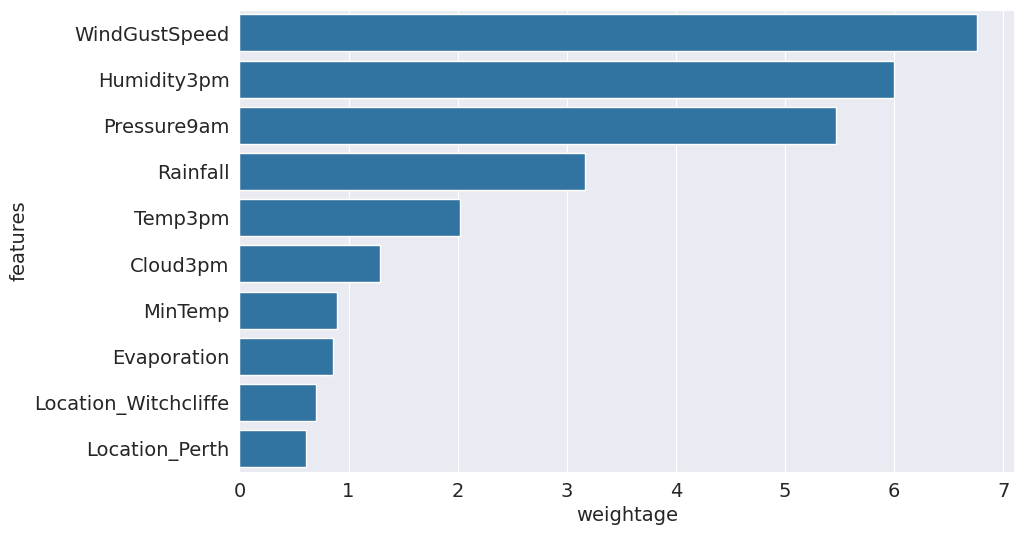

In [ ]:
# plt.figure(figsize=(10,50))
sns.barplot(x='weightage', y='features', data=weight_df.sort_values(by='weightage', ascending=False).head(10))

In [ ]:
model.intercept_

array([-2.44956109])

## **Making predictions and Evaluating the model**

In [ ]:
X_train = train_inputs[numerical_cols + encode_cols]
X_val = val_inputs[numerical_cols + encode_cols]
X_test = test_inputs[numerical_cols + encode_cols]

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_targets

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

Here, it is crucial to check accuracy between the train_preds and train_targets, to check how good the model is trained, and how much changes does it.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_pred, train_targets)

0.8519206433440829

This gives us the **85.1%** accuracy on the training dataset.

We can also check the probability whether the condition will be yes or no, and it is possible only in the case of classification. We will use predict_proba method for the same.

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94401311, 0.05598689],
       [0.94074304, 0.05925696],
       [0.96093735, 0.03906265],
       ...,
       [0.98749147, 0.01250853],
       [0.98334725, 0.01665275],
       [0.87453712, 0.12546288]])

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

Here, we can also create a confusion matrix, where there are 4 parts, True Positive, True Negative, False Positive, False Negative.

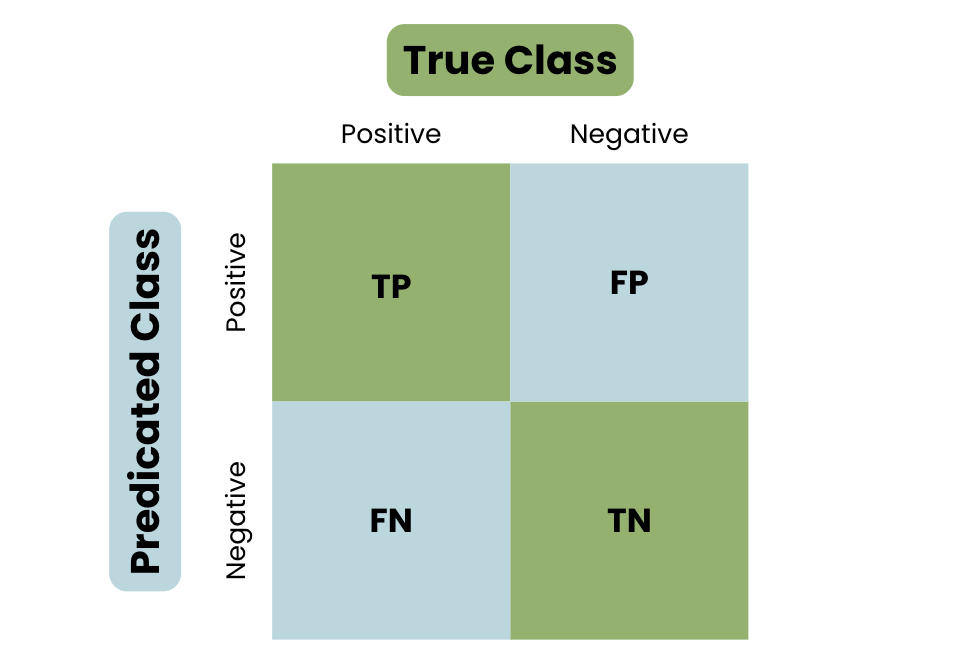

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_pred, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

def predict_and_plot(inputs, targets, name=""):
    # Ensure plt functions are not overridden
    plt.xlabel = plt.matplotlib.pyplot.xlabel
    plt.ylabel = plt.matplotlib.pyplot.ylabel
    plt.title = plt.matplotlib.pyplot.title

    # Predictions
    preds = model.predict(inputs)

    # Calculate accuracy
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Confusion matrix
    cm = confusion_matrix(targets, preds, normalize="true")

    # Plotting confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("{} Confusion Matrix".format(name))
    plt.show()

    return preds

Accuracy: 85.19%


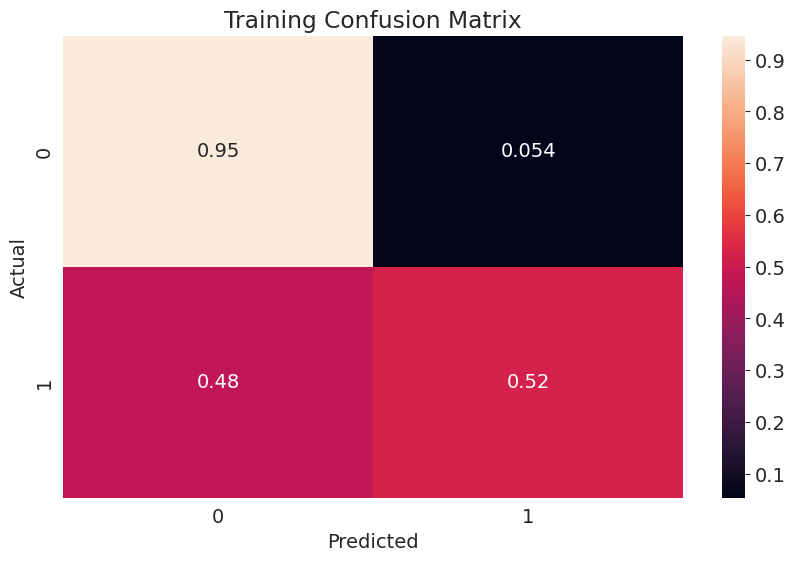

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, "Training")

Accuracy: 85.40%


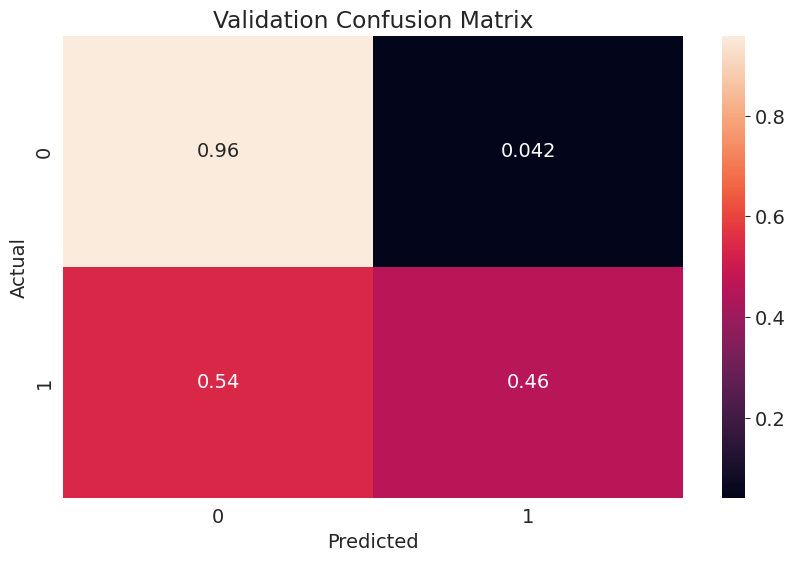

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, "Validation")

Accuracy: 84.20%


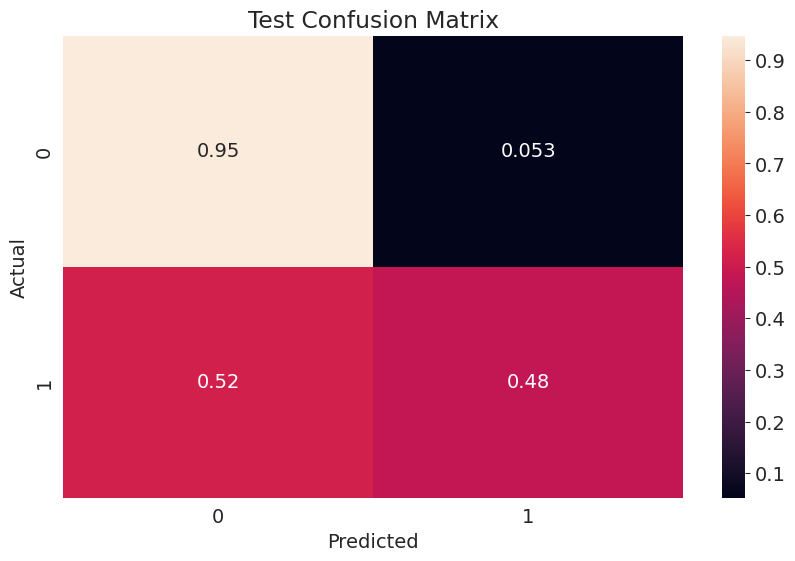

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, "Test")

Here, we got **84.2%** accuracy on the test set, but how good is 84% accuracy actually? The simple way to verify this, is by comparing it's result to a "random" model.

In [ ]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

In [ ]:
def all_no(inputs):
  return np.full(len(inputs), "No")

In [ ]:
accuracy_score(test_targets, random_guess(X_test))

0.4936211590820692

In [ ]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Remeber, always analyse your models with these dumb or random models, so that we get an idea of how good our model is, and weel did we train it.

## **Making predictions on a Single Input**

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 90.0, # this is an imp feature to determine if it will rain
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

We can't directly feed a dictionary to the model, as it expects numerical columsn and all, so we can't give categorical values.

In [ ]:
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           90.0         NW  ...         20.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

Now, we have converted the data in the form of DataFrame. Still, we can not feed the model this data, as it's raw, contains NaN values and all. So, we need to do all the preprocessing steps with the same row too.

1. Imputation of missing values using `imputer` we created earlier.

2. Scaling numerical values that we did using `scaler`.

3. Encoding categorical features using `encoder`.

In [ ]:
new_input_df[numerical_cols] = impute.transform(new_input_df[numerical_cols])
new_input_df[numerical_cols] = scaler.transform(new_input_df[numerical_cols])
new_input_df[encode_cols] = encoder.transform(new_input_df[categorical_cols])

<ipython-input-120-82570fa8207b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-120-82570fa8207b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-120-82570fa8207b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-120-82570fa8207b>:3: PerformanceWarning:

In [ ]:
new_input_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine  0.747642  0.718336  0.027493     0.028966  0.526244   

  WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SE  WindDir3pm_SSE  \
0         NNW       0.651163         NW  ...           0.0             0.0   

   WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0           0.0            1.0  

[1 rows x 124 columns]

In [ ]:
X_new_input = new_input_df[numerical_cols + encode_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.651163   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0           0.1      0.229885         0.89         0.58  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

In [ ]:
prediction = model.predict(X_new_input)[0] # here, even if we don't use [0], it won't matter as there is just 1 row.
prediction

'Yes'

In [ ]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.11219579, 0.88780421])

In [ ]:
# everything in just one function
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numerical_cols] = impute.transform(input_df[numerical_cols])
  input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
  input_df[encode_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numerical_cols + encode_cols]
  prediction = model.predict(X_input)[0]
  prob = model.predict_proba(X_input)[0]
  return prediction, prob

In [ ]:
new_input = {'Date': '2024-06-14',
             'Location': 'Sydney',
             'MinTemp': 12,
             'MaxTemp': 16,
             'Rainfall': 4.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'SSW',
             'WindGustSpeed': 17.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 11.0,
             'WindSpeed3pm': 10.0,
             'Humidity9am': 59.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
predict_input(new_input)

<ipython-input-125-2a42543b7441>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-125-2a42543b7441>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-125-2a42543b7441>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-125-2a42543b7441>:5: PerformanceWarning:

('No', array([0.55721575, 0.44278425]))

## **Saving and Loading trained model**

We can save the parameters (weights & biases) of our trained model to disk, so that we need not train the model from scratch everytime we wish to use it. Along with the model, it's important to save imputers, scalers, encoders, and even column names. Anything that will be required while generating predictions using the model should be saved.

In [ ]:
import joblib

In [ ]:
ausie_rain = {
    'model':model,
    'imputer': impute,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols':input_cols,
    'target_cols': target_col,
    'numerical_cols': numerical_cols,
    'categorical_cols':categorical_cols,
    'encode_cols': encode_cols
}

In [ ]:
joblib.dump(ausie_rain, "ausie_rain.joblib")

['ausie_rain.joblib']

In [ ]:
aussie_rain2 = joblib.load('/content/drive/MyDrive/Colab Notebooks/ausie_rain.joblib')

In [ ]:
aussie_rain2['model']

LogisticRegression(solver='liblinear')

In [ ]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8420070011668611